# **Featching Libraries**

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# **Loading Data Set**

In [29]:
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

Observation: Here, we load HR Analytics dataset.

In [30]:
df.columns

Observation: Here, We see all the columns of our dataset.

In [31]:
df.shape

Observation: Here, we see all the rows and all the columns size.

In [32]:
df.info()

Observation: Here, we see all the relative information about our data like null values, data type, memory used etc.

# **Finding Missing Values**

In [33]:
df.isnull().sum()

Observation: Here, we see there is no any null values present in data.

In [ ]:
sns.heatmap(df.isnull(), cmap = 'viridis')

Observation: Here, we see there are no any null values present in side our data.

In [ ]:
df.dtypes

Observation: Here, We see data type as integer and object. We should convert object columns into float or integer.

# **Use the Label Encoder for converting object columns:**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Observation: Here, we use label encoder to convert object columns into integer. And taking it's instance.

In [ ]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = le.fit_transform(df[i].values.reshape(-1, 1))
        
df

Observation: Here, we see all the object type columns convert into integer.

In [ ]:
df.info()

Observation: Here, we see all columns are integer.

# **Drop unnecessary columns:**

In [ ]:
df = df.drop(['BusinessTravel','DistanceFromHome','EmployeeCount','Gender','MaritalStatus','Over18','WorkLifeBalance','StandardHours'], axis = 1)
df.head()

Observation: Here, we droped unnecessary data.

In [ ]:
df.shape

# **EDA process**

In [ ]:
df.describe()

Observation: Describe method shows us the total count value, mean, standard deviation, minimum value, maximum value, median, 25% and 75% of data of each columns. Standard deviation shows spread of data. 50% is showing the median of data. The gap between maximum and 75% is shows us skewness of column. If it is higher then that column, has skewness else no skewnes is present.

# **Find Correlation**

In [ ]:
df_cor = df.corr()
df_cor

Observation: Here we see correlations between each and every column. Here 1 shows highly correlated value, negative figure shows less correlated and between 1 to 0 shows positive correlated values.

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(df_cor, cmap = 'Blues_r', annot = True)

Observation: Here,we see in the above correlation the lighter colour shows positive correlation and darker colour shows negative correlations between each columns.

# **Data Visualization**

In [ ]:
df.columns

In [ ]:
sns.violinplot(df['Department'])
plt.title('Department', fontsize = 15)

plt.show()

In [ ]:
sns.violinplot(df['Education'])
plt.title('Education', fontsize = 15)

plt.show()

In [ ]:
sns.violinplot(df['EducationField'])
plt.title('EducationField', fontsize = 15)

plt.show()

In [ ]:
sns.violinplot(df['MonthlyIncome'])
plt.title('MonthlyIncome', fontsize = 15)

plt.show()

In [ ]:
sns.violinplot(df['NumCompaniesWorked'])
plt.title('Work ex.', fontsize = 15)

plt.show()

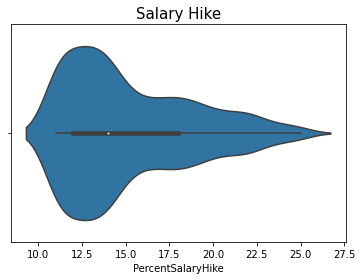

In [50]:
sns.violinplot(df['PercentSalaryHike'])
plt.title('Salary Hike', fontsize = 15)

plt.show()

# **Calculating Skewness**

In [51]:
df.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
Department                  0.172231
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
d

Observation: Here, we see there is no skewness present in side our data.

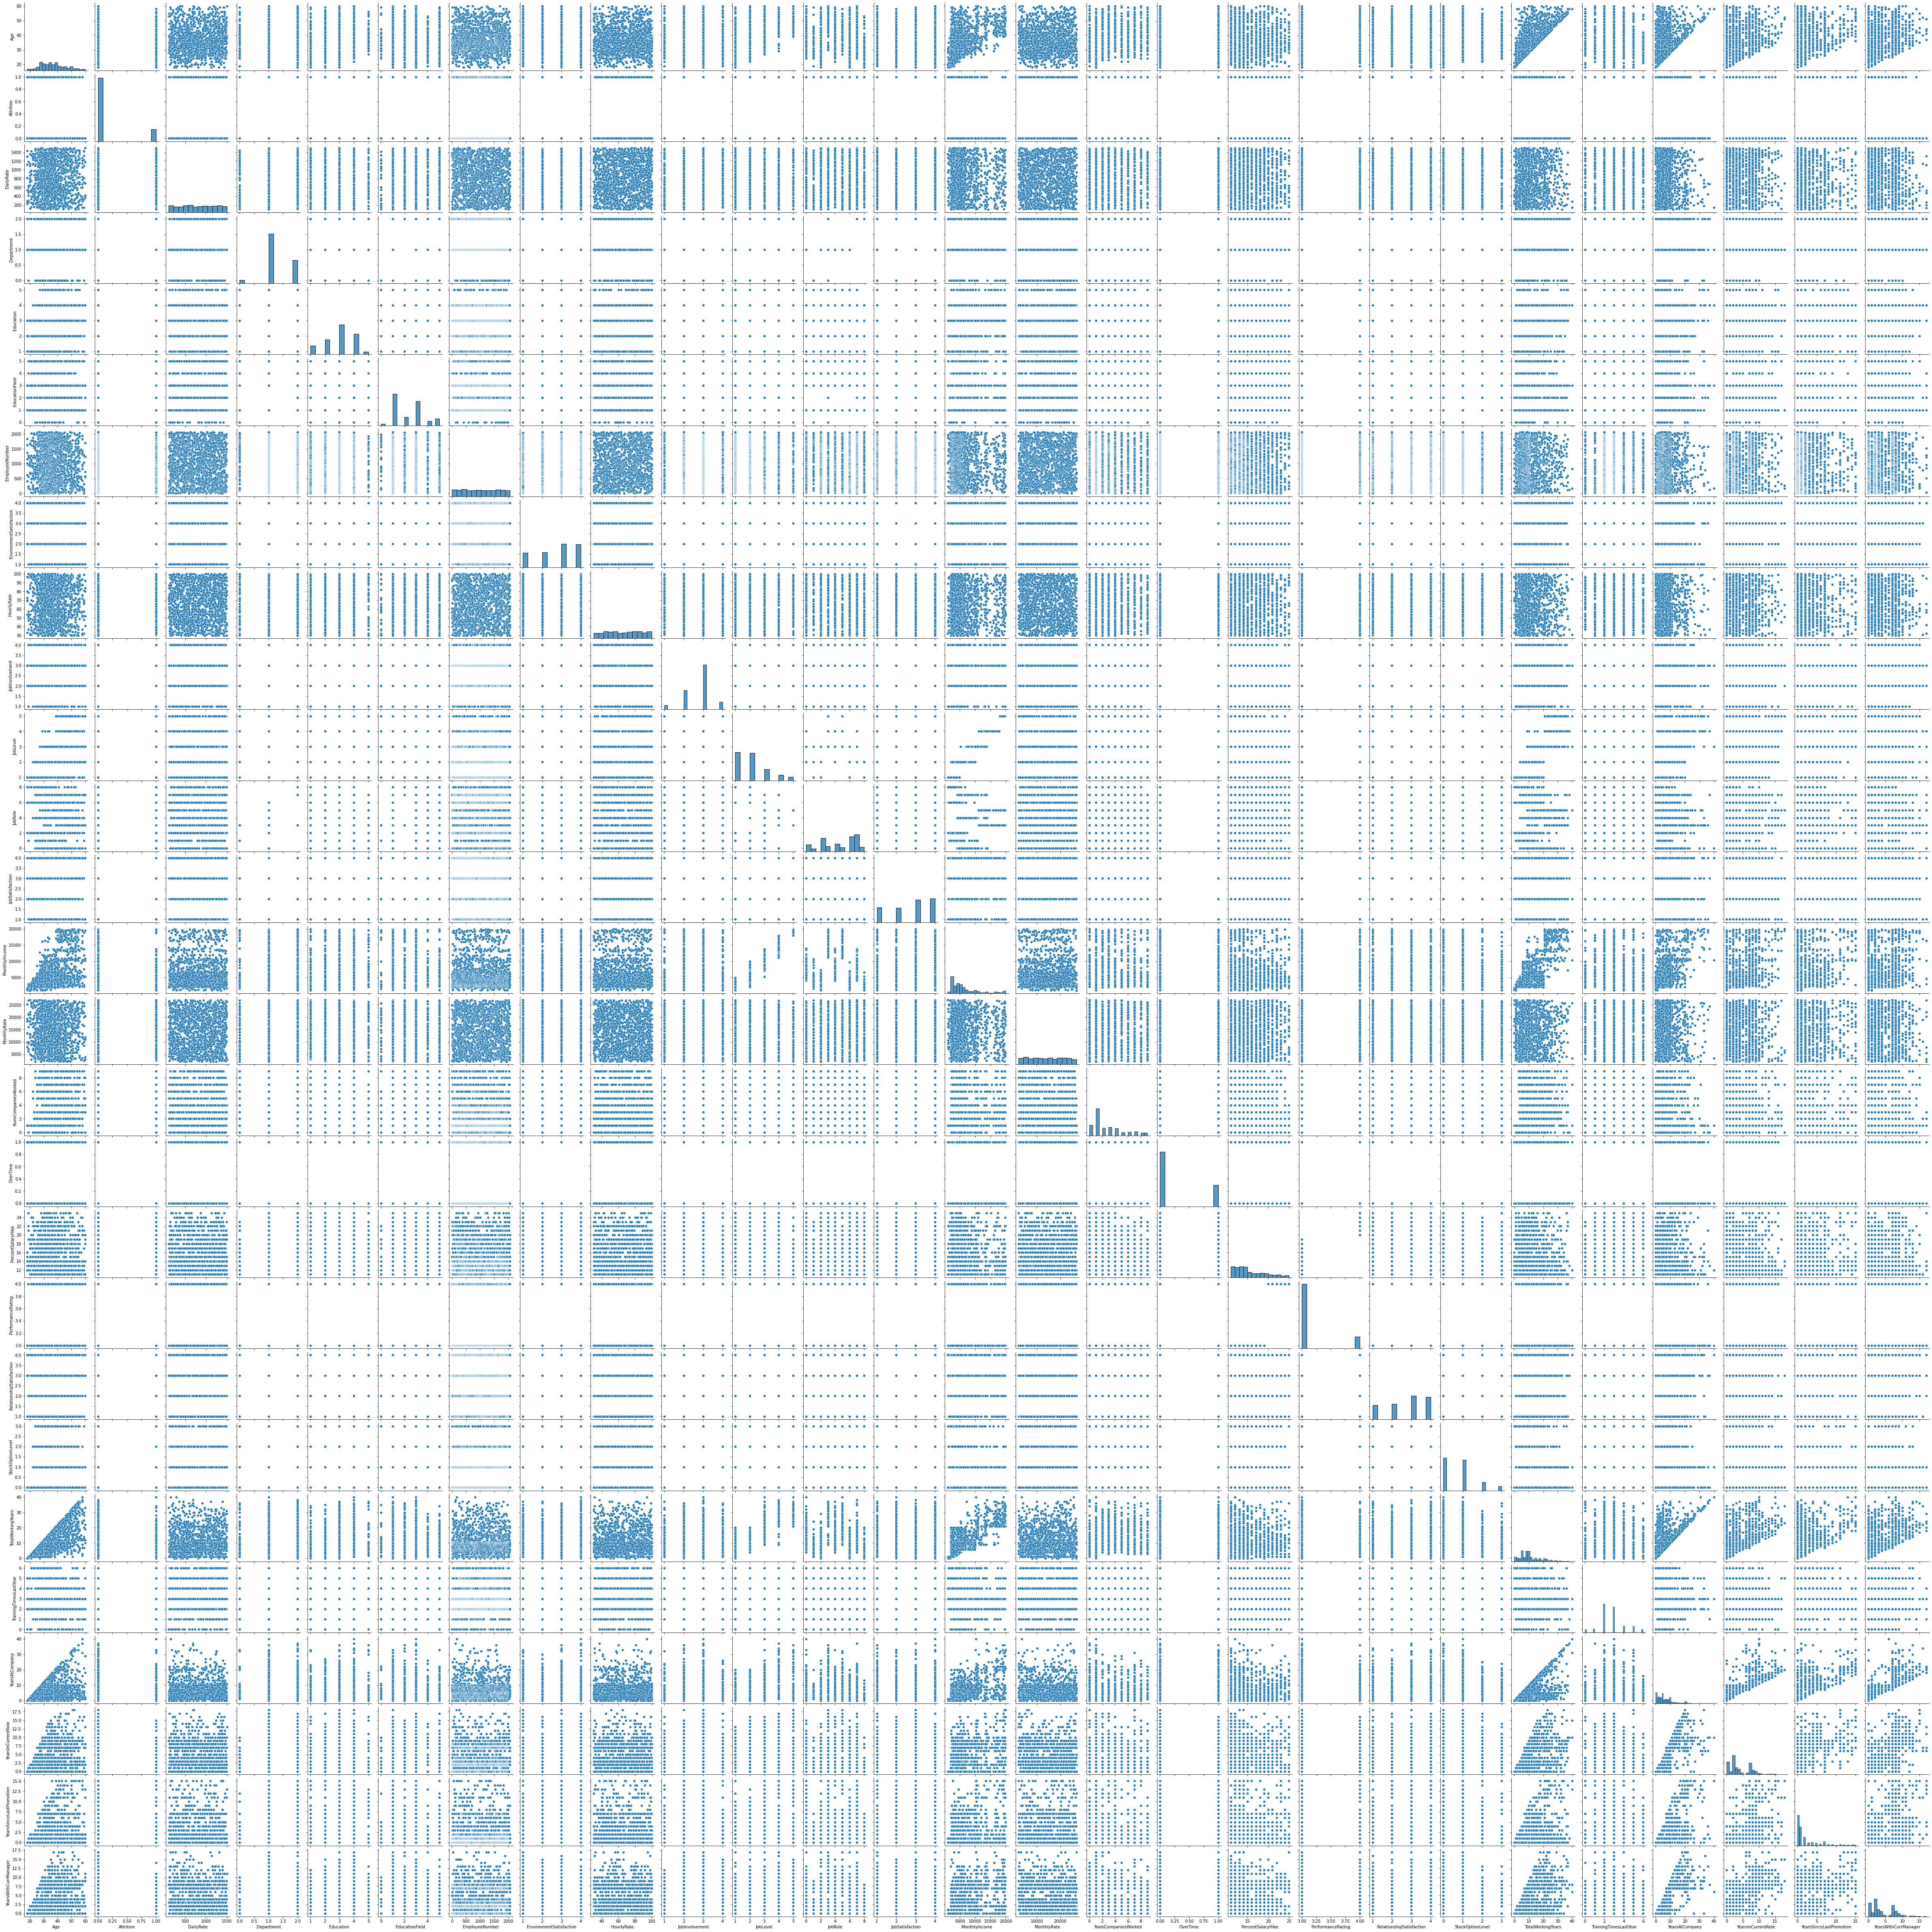

In [27]:
sns.pairplot(df)

Observation: Here, we see the relation between each and every columns.

# **Finding Outliers**

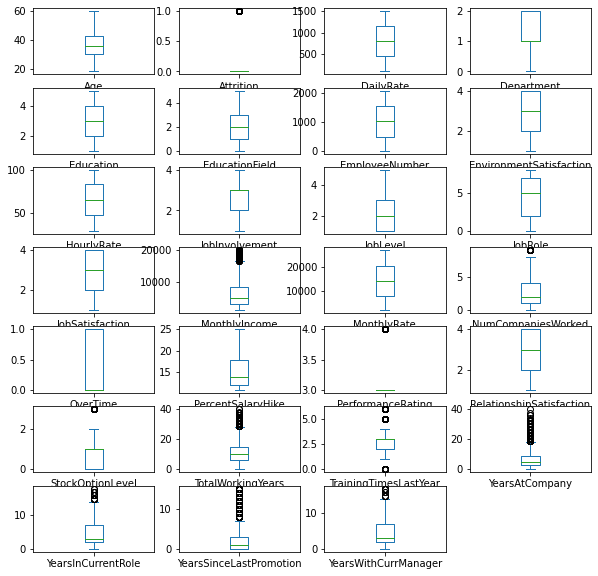

In [52]:
df.plot(kind = 'box', subplots = True, layout = (7,4), figsize = (10,10))
plt.show()

# **Removing Outliers**

In [53]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430]),
 array([26, 25, 23, 25, 24, 25, 21, 21, 23, 25, 24, 25, 26, 21, 23, 25, 26,
        25, 21, 26, 23, 24, 25, 24, 26, 23, 25, 21, 23, 24, 25, 25, 26, 21,
        23, 23, 25, 25, 21, 24, 23, 23, 25, 23, 26, 25, 23, 21, 23, 25, 26,
        21, 26, 23, 25, 23, 26

Observation: Here, we are calculating zscore to find outliers.

In [54]:
df_zscore = df[(z<3).all(axis = 1)]
df_zscore

Age  Attrition  DailyRate  Department  Education  EducationField  \
0      41          1       1102           2          2               1   
1      49          0        279           1          1               1   
2      37          1       1373           1          2               4   
3      33          0       1392           1          4               1   
4      27          0        591           1          1               3   
...   ...        ...        ...         ...        ...             ...   
1465   36          0        884           1          2               3   
1466   39          0        613           1          1               3   
1467   27          0        155           1          3               1   
1468   49          0       1023           2          3               3   
1469   34          0        628           1          3               3   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0                  1                        2          94               3   
1                  2                        3          61               2   
2                  4                        4          92               2   
3                  5                        4          56               3   
4                  7                        1          40               3   
...              ...                      ...         ...             ...   
1465            2061                        3          41               4   
1466            2062                        4          42               2   
1467            2064                        2          87               4   
1468            2065                        4          63               2   
1469            2068                        2          82               4   

      ...  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0     ...                 11                  3                         1   
1     ...                 23                  4                         4   
2     ...                 15                  3                         2   
3     ...                 11                  3                         3   
4     ...                 12                  3                         4   
...   ...                ...                ...                       ...   
1465  ...                 17                  3                         3   
1466  ...                 15                  3                         1   
1467  ...                 20                  4                         2   
1468  ...                 14                  3                         4   
1469  ...                 12                  3                         1   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                

Observation: Here, we removed outliers from the data.

In [55]:
df_zscore.shape

(1387, 27)

# **Finding Percentage Data Loss**

In [56]:
Data_loss = ((1470 - 1387)/1470)*100
Data_loss

5.646258503401361

# **Separating data into target and independent variable:**

In [58]:
target = pd.DataFrame(df_zscore.Attrition)
target

Attrition
0             1
1             0
2             1
3             0
4             0
...         ...
1465          0
1466          0
1467          0
1468          0
1469          0

[1387 rows x 1 columns]

In [59]:
x = df_zscore.iloc[:,2:]
x

DailyRate  Department  Education  EducationField  EmployeeNumber  \
0          1102           2          2               1               1   
1           279           1          1               1               2   
2          1373           1          2               4               4   
3          1392           1          4               1               5   
4           591           1          1               3               7   
...         ...         ...        ...             ...             ...   
1465        884           1          2               3            2061   
1466        613           1          1               3            2062   
1467        155           1          3               1            2064   
1468       1023           2          3               3            2065   
1469        628           1          3               3            2068   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  JobRole  \
0                           2          94               3         2        7   
1                           3          61               2         2        6   
2                           4          92               2         1        2   
3                           4          56               3         1        6   
4                           1          40               3         1        2   
...                       ...         ...             ...       ...      ...   
1465                        3          41               4         2        2   
1466                        4          42               2         3        0   
1467                        2          87               4         2        4   
1468                        4          63               2         2        7   
1469                        2          82               4         2        2   

      ...  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0     ...                 11                  3                         1   
1     ...                 23                  4                         4   
2     ...                 15                  3                         2   
3     ...                 11                  3                         3   
4     ...                 12                  3                         4   
...   ...                ...                ...                       ...   
1465  ...                 17                  3                         3   
1466  ...                 15                  3                         1   
1467  ...                 20                  4                         2   
1468  ...                 14                  3                         4   
1469  ...                 12                  3                         1   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   


In [60]:
y = target
y

Attrition
0             1
1             0
2             1
3             0
4             0
...         ...
1465          0
1466          0
1467          0
1468          0
1469          0

[1387 rows x 1 columns]

In [61]:
x.shape

(1387, 25)

In [62]:
y.shape

(1387, 1)

## **Training and Testing the data:**

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .22, random_state = 45)

In [64]:
x_train.shape

(1081, 25)

In [66]:
x_test.shape

(306, 25)

In [67]:
y_train.shape

(1081, 1)

In [68]:
y_test.shape

(306, 1)

In [69]:
lg = LogisticRegression()

Observation: Here, we are taking instance of Logistic Regression.

In [70]:
lg.fit(x_train, y_train)

LogisticRegression()

Observation: Fitting the model.

In [71]:
pred = lg.predict(x_test)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]


Observation: Model is predicting test report.

In [72]:
print('accuracy_score:', accuracy_score(y_test, pred))

accuracy_score: 0.8660130718954249


Observation: Model is giving it's 86% accuracy.

In [73]:
print(confusion_matrix(y_test, pred))

[[260   3]
 [ 38   5]]


Observation: Here, we can see error in matrix.

In [74]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       263
           1       0.62      0.12      0.20        43

    accuracy                           0.87       306
   macro avg       0.75      0.55      0.56       306
weighted avg       0.84      0.87      0.82       306



In [75]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
dtc = DecisionTreeClassifier()


model = [lg, gnb, svc, dtc]

for m in model:
    m.fit(x_train, y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print('Accuracy score of', m, 'is:')
    print(accuracy_score(y_test, predm))
    print(confusion_matrix(y_test, predm))
    print(classification_report(y_test, predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.8660130718954249
[[260   3]
 [ 38   5]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       263
           1       0.62      0.12      0.20        43

    accuracy                           0.87       306
   macro avg       0.75      0.55      0.56       306
weighted avg       0.84      0.87      0.82       306



Accuracy score of GaussianNB() is:
0.738562091503268
[[197  66]
 [ 14  29]]
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       263
           1       0.31      0.67      0.42        43

    accuracy                           0.74       306
   macro avg       0.62      0.71      0.63       306
weighted avg       0.85      0.74      0.77       306



Accuracy score of SVC() is:
0.8594771241830066
[[263   0]
 [ 43   0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       263
  

Observation: Here, we can see our model gives 86% of accuracy.

# **Saving the best model:**

In [76]:
import joblib
joblib.dump(dtc, 'lgfile.obj')
dtc_from_joblib = joblib.load('lgfile.obj')

dtc_from_joblib.predict(x_test)

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,